In [ ]:
# ruff: noqa: E501

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from rock_physics_open.fluid_models.oil_model import oil_properties

from fmu.pem import INTERNAL_EQUINOR

In [12]:
# Define parameter ranges for our analysis
temperature = np.linspace(50.0, 150.0, 100)  # Temperature in °C
const_temp = 100.0 * np.ones_like(temperature)
pressure = np.linspace(20.0e6, 50.0e6, 100)  # Pressure in Pa
const_pressure = 35.0e6 * np.ones_like(temperature)

# Oil composition parameters (kept constant)
oil_density1 = 850.0 * np.ones_like(
    temperature
)  # Oil density in kg/m³ (typical crude oil)
gas_gravity1 = 0.70 * np.ones_like(temperature)  # Gas gravity relative to air
gor1 = 50.0 * np.ones_like(temperature)  # Gas-oil ratio in standard m³/m³

# Oil composition parameters (kept constant)
oil_density2 = 880.0 * np.ones_like(
    temperature
)  # Oil density in kg/m³ (typical crude oil)
gas_gravity2 = 0.80 * np.ones_like(temperature)  # Gas gravity relative to air
gor2 = 100.0 * np.ones_like(temperature)

# Calculate oil properties for different scenarios
# Varying temperature
oil_t = oil_properties(temperature, const_pressure, oil_density1, gor1, gas_gravity1)
oil_t2 = oil_properties(temperature, const_pressure, oil_density2, gor1, gas_gravity1)
oil_t3 = oil_properties(temperature, const_pressure, oil_density1, gor2, gas_gravity1)
oil_t4 = oil_properties(temperature, const_pressure, oil_density1, gor1, gas_gravity2)

# Varying pressure
oil_p = oil_properties(const_temp, pressure, oil_density1, gor1, gas_gravity1)
oil_p2 = oil_properties(const_temp, pressure, oil_density2, gor1, gas_gravity1)
oil_p3 = oil_properties(const_temp, pressure, oil_density1, gor2, gas_gravity1)
oil_p4 = oil_properties(const_temp, pressure, oil_density1, gor1, gas_gravity2)

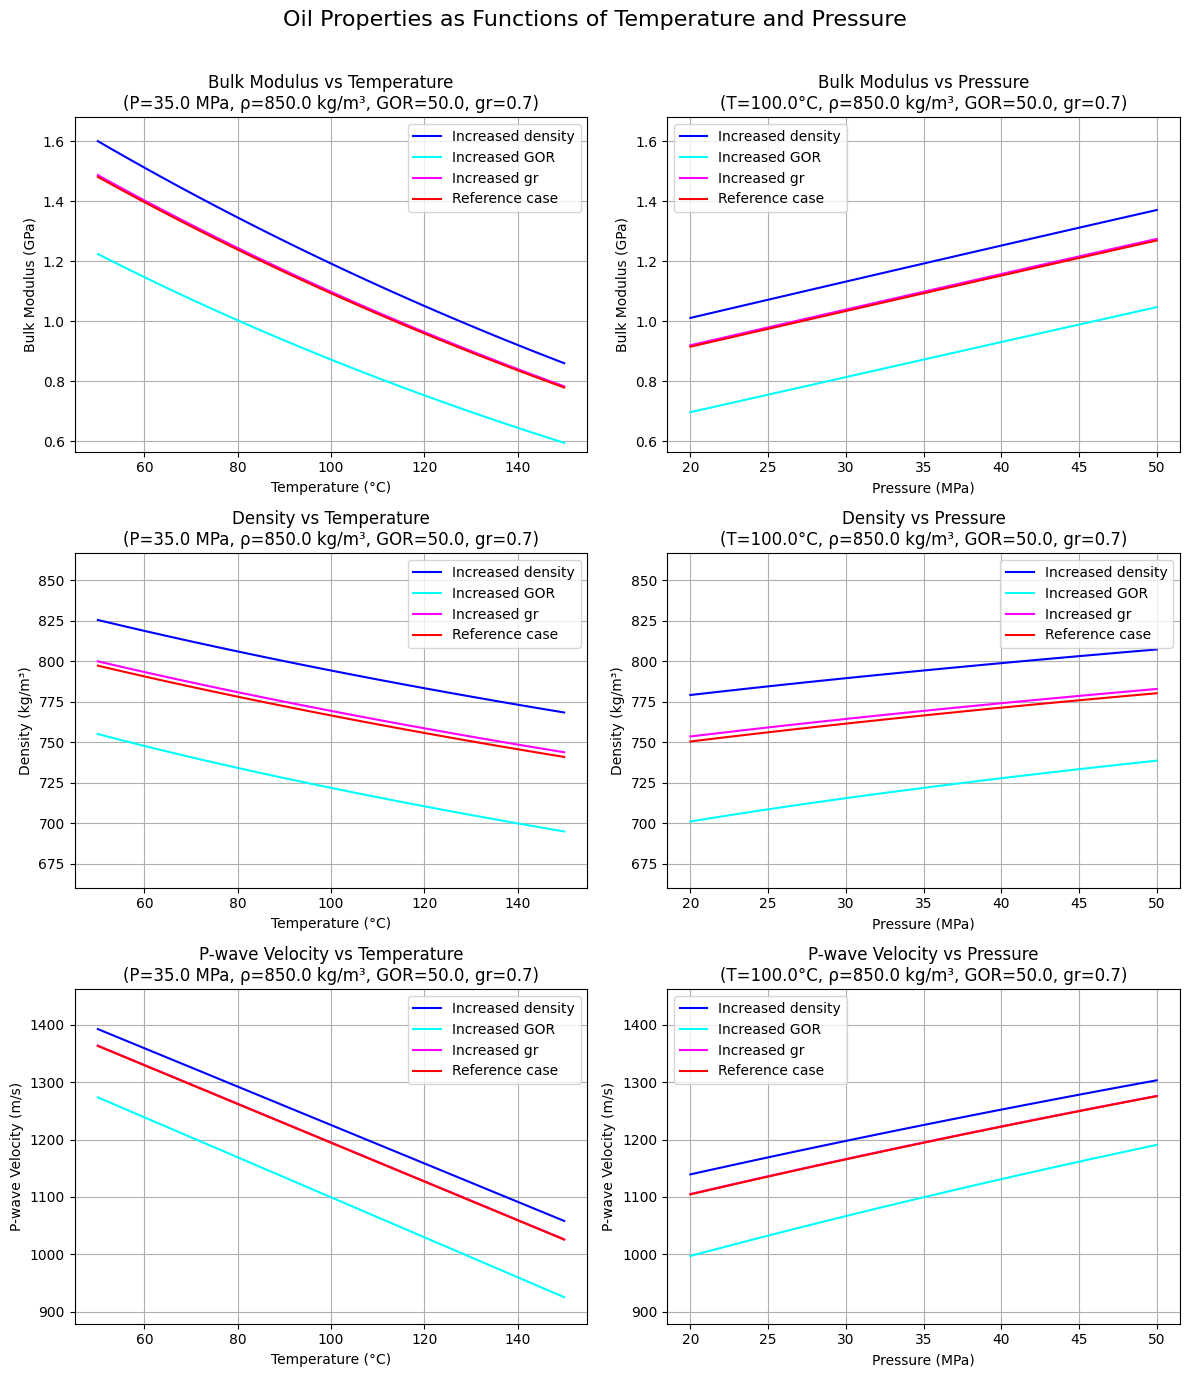

In [14]:
# Create a 3x2 grid of subplots (only temperature and pressure variations)
fig, axes = plt.subplots(3, 2, figsize=(12, 14))

# Row 1: Bulk modulus (K)
# Temperature variation
axes[0, 0].plot(temperature, oil_t2[2] / 1e9, color="blue", label="Increased density")
axes[0, 0].plot(temperature, oil_t3[2] / 1e9, color="cyan", label="Increased GOR")
axes[0, 0].plot(temperature, oil_t4[2] / 1e9, color="magenta", label="Increased gr")
axes[0, 0].plot(temperature, oil_t[2] / 1e9, color="red", label="Reference case")
axes[0, 0].set_xlabel("Temperature (°C)")
axes[0, 0].set_ylabel("Bulk Modulus (GPa)")
axes[0, 0].set_title(
    f"Bulk Modulus vs Temperature\n(P={const_pressure[0] / 1e6} MPa, ρ={oil_density1[0]} kg/m³, GOR={gor1[0]}, gr={gas_gravity1[0]})"
)
axes[0, 0].grid(True)
axes[0, 0].legend()

# Pressure variation
axes[0, 1].plot(
    pressure / 1e6, oil_p2[2] / 1e9, label="Increased density", color="blue"
)
axes[0, 1].plot(pressure / 1e6, oil_p3[2] / 1e9, label="Increased GOR", color="cyan")
axes[0, 1].plot(pressure / 1e6, oil_p4[2] / 1e9, label="Increased gr", color="magenta")
axes[0, 1].plot(pressure / 1e6, oil_p[2] / 1e9, label="Reference case", color="red")
axes[0, 1].set_xlabel("Pressure (MPa)")
axes[0, 1].set_ylabel("Bulk Modulus (GPa)")
axes[0, 1].set_title(
    f"Bulk Modulus vs Pressure\n(T={const_temp[0]}°C, ρ={oil_density1[0]} kg/m³, GOR={gor1[0]}, gr={gas_gravity1[0]})"
)
axes[0, 1].grid(True)
axes[0, 1].legend()

# Synchronize y-axis limits for bulk modulus plots
bulk_mod_data = np.concatenate(
    [
        oil_t[2] / 1e9,
        oil_t2[2] / 1e9,
        oil_t3[2] / 1e9,
        oil_t4[2] / 1e9,
        oil_p[2] / 1e9,
        oil_p2[2] / 1e9,
        oil_p3[2] / 1e9,
        oil_p4[2] / 1e9,
    ]
)
bulk_mod_ylim = [np.min(bulk_mod_data) * 0.95, np.max(bulk_mod_data) * 1.05]
axes[0, 0].set_ylim(bulk_mod_ylim)
axes[0, 1].set_ylim(bulk_mod_ylim)

# Row 2: Density
# Temperature variation
axes[1, 0].plot(temperature, oil_t2[1], color="blue", label="Increased density")
axes[1, 0].plot(temperature, oil_t3[1], color="cyan", label="Increased GOR")
axes[1, 0].plot(temperature, oil_t4[1], color="magenta", label="Increased gr")
axes[1, 0].plot(temperature, oil_t[1], color="red", label="Reference case")
axes[1, 0].set_xlabel("Temperature (°C)")
axes[1, 0].set_ylabel("Density (kg/m³)")
axes[1, 0].set_title(
    f"Density vs Temperature\n(P={const_pressure[0] / 1e6} MPa, ρ={oil_density1[0]} kg/m³, GOR={gor1[0]}, gr={gas_gravity1[0]})"
)
axes[1, 0].grid(True)
axes[1, 0].legend()

# Pressure variation
axes[1, 1].plot(pressure / 1e6, oil_p2[1], label="Increased density", color="blue")
axes[1, 1].plot(pressure / 1e6, oil_p3[1], label="Increased GOR", color="cyan")
axes[1, 1].plot(pressure / 1e6, oil_p4[1], label="Increased gr", color="magenta")
axes[1, 1].plot(pressure / 1e6, oil_p[1], label="Reference case", color="red")
axes[1, 1].set_xlabel("Pressure (MPa)")
axes[1, 1].set_ylabel("Density (kg/m³)")
axes[1, 1].set_title(
    f"Density vs Pressure\n(T={const_temp[0]}°C, ρ={oil_density1[0]} kg/m³, GOR={gor1[0]}, gr={gas_gravity1[0]})"
)
axes[1, 1].grid(True)
axes[1, 1].legend()

# Synchronize y-axis limits for density plots
density_data = np.concatenate(
    [
        oil_t[1],
        oil_t2[1],
        oil_t3[1],
        oil_t4[1],
        oil_p[1],
        oil_p2[1],
        oil_p3[1],
        oil_p4[1],
    ]
)
density_ylim = [np.min(density_data) * 0.95, np.max(density_data) * 1.05]
axes[1, 0].set_ylim(density_ylim)
axes[1, 1].set_ylim(density_ylim)

# Row 3: P-wave velocity (Vp)

# Temperature variation
axes[2, 0].plot(temperature, oil_t2[0], color="blue", label="Increased density")
axes[2, 0].plot(temperature, oil_t3[0], color="cyan", label="Increased GOR")
axes[2, 0].plot(temperature, oil_t4[0], color="magenta", label="Increased gr")
axes[2, 0].plot(temperature, oil_t[0], color="red", label="Reference case")
axes[2, 0].set_xlabel("Temperature (°C)")
axes[2, 0].set_ylabel("P-wave Velocity (m/s)")
axes[2, 0].set_title(
    f"P-wave Velocity vs Temperature\n(P={const_pressure[0] / 1e6} MPa, ρ={oil_density1[0]} kg/m³, GOR={gor1[0]}, gr={gas_gravity1[0]})"
)
axes[2, 0].grid(True)
axes[2, 0].legend()

# Pressure variation
axes[2, 1].plot(pressure / 1e6, oil_p2[0], label="Increased density", color="blue")
axes[2, 1].plot(pressure / 1e6, oil_p3[0], label="Increased GOR", color="cyan")
axes[2, 1].plot(pressure / 1e6, oil_p4[0], label="Increased gr", color="magenta")
axes[2, 1].plot(pressure / 1e6, oil_p[0], label="Reference case", color="red")
axes[2, 1].set_xlabel("Pressure (MPa)")
axes[2, 1].set_ylabel("P-wave Velocity (m/s)")
axes[2, 1].set_title(
    f"P-wave Velocity vs Pressure\n(T={const_temp[0]}°C, ρ={oil_density1[0]} kg/m³, GOR={gor1[0]}, gr={gas_gravity1[0]})"
)
axes[2, 1].grid(True)
axes[2, 1].legend()

# Synchronize y-axis limits for velocity plots
velocity_data = np.concatenate(
    [
        oil_t[0],
        oil_t2[0],
        oil_t3[0],
        oil_t4[0],
        oil_p[0],
        oil_p2[0],
        oil_p3[0],
        oil_p4[0],
    ]
)
velocity_ylim = [np.min(velocity_data) * 0.95, np.max(velocity_data) * 1.05]
axes[2, 0].set_ylim(velocity_ylim)
axes[2, 1].set_ylim(velocity_ylim)

# Fix title overlap by setting layout properly
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)
fig.suptitle("Oil Properties as Functions of Temperature and Pressure", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(r"../documentation/docs/images/oil_properties_complete.png", dpi=300)
plt.show()